In [1]:
import pickle
import networkx as nx
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import netbone as nb

c:\users\kasia\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Can't load ECM Model in windows, try using it on linux


# Yearly

In [94]:
sns.set_style("white")
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (7,2)

In [3]:
def visualise_networks_yearly(k, years, b_level, main_clubs, title, bbox_to_anchor=(1.7, 1.25)):
    group_all = set()
    gs = []
    for y in years:
        file_name = f'G_{k}_y{y}.pickle'

        # 1. backbone
        G = pickle.load(open(f'graphs/yearly/{file_name}', 'rb'))
        attr = nx.get_node_attributes(G, 'party')

        df = nb.disparity(G)
        g = nb.filters.fraction_filter(df, b_level)
        nx.set_node_attributes(g, attr, "party")

        # 2. category other
        for node_id, club in g.nodes(data='party'):
            if club not in main_clubs:
                g.nodes[node_id]['party'] = 'Other'
        gs.append(g)

        # 3. color mapping 
        group = set(nx.get_node_attributes(g, 'party').values())
        group_all.update(group)

    mapping = dict(zip(sorted(group_all), itertools.count()))
    vmin=min(list(mapping.values()))
    vmax=max(list(mapping.values()))

    fig, ax = plt.subplots(1, 4)
    fig.tight_layout()

    for j in range(len(gs)):
        g = gs[j]
        nodes = g.nodes()
        colors = [mapping[g.nodes[n]['party']] for n in nodes]
        pos = nx.spring_layout(g)
        ec = nx.draw_networkx_edges(g, pos, alpha=0.008, ax=ax[j])
        nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet, ax=ax[j],
                                   vmin=vmin, vmax=vmax)
        ax[j].axis('off')

    ax[0].set_title(title, size=15)
    lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
                    label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
    handles = [lp(i) for i in list(mapping.values())]
    plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig(f'images/networks/{k}.pdf', bbox_inches='tight')
    plt.show()

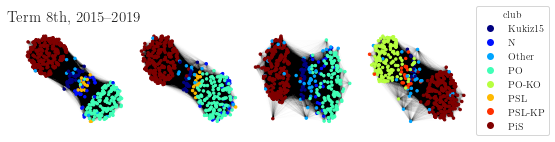

In [10]:
k = 8
years = [1,2,3,4]
b_level = 0.65
main_clubs = ['PiS', 'PO', 'PO-KO', 'Kukiz15', 'PSL-KP', 'PSL', 'N']
title = r'Term 8th, 2015--2019'
bbox_to_anchor=(1.7, 1.25)

visualise_networks_yearly(k, years, b_level, main_clubs, title, bbox_to_anchor)

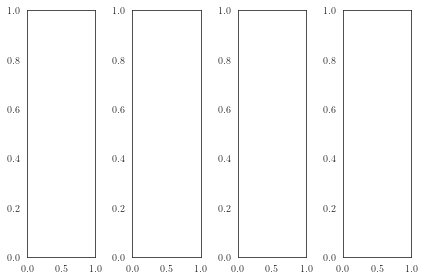

In [5]:
k = 8
years = [1,2,3,4]
b_level = 0.65
main_clubs = ['PiS', 'PO', 'PO-KO', 'Kukiz15', 'PSL-KP', 'PSL', 'N']
title = r'Term 8th, 2015--2019'
bbox_to_anchor=(1.7, 1.25)


group_all = set()
gs = []
for y in years:
    file_name = f'G_{k}_y{y}.pickle'

    # 1. backbone
    G = pickle.load(open(f'graphs/yearly/{file_name}', 'rb'))
    attr = nx.get_node_attributes(G, 'party')

    df = nb.disparity(G)
    g = nb.filters.fraction_filter(df, b_level)
    nx.set_node_attributes(g, attr, "party")

    # 2. category other
    for node_id, club in g.nodes(data='party'):
        if club not in main_clubs:
            g.nodes[node_id]['party'] = 'Other'
    gs.append(g)

    # 3. color mapping 
    group = set(nx.get_node_attributes(g, 'party').values())
    group_all.update(group)

mapping = dict(zip(sorted(group_all), itertools.count()))
vmin=min(list(mapping.values()))
vmax=max(list(mapping.values()))

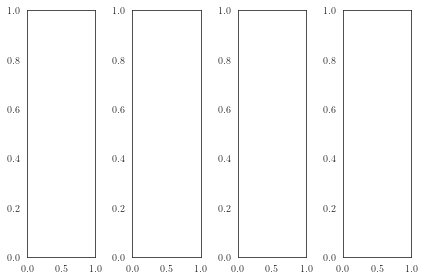

In [86]:
fig, ax = plt.subplots(1, 4)
fig.tight_layout()

In [87]:
j = 3
g = gs[j]
nodes = g.nodes()
colors = [mapping[g.nodes[n]['party']] for n in nodes]
pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.008, ax=ax[j])
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet, ax=ax[j],
                           vmin=vmin, vmax=vmax)
ax[j].axis('off')

(-0.4954790833540549,
 0.6336458462284396,
 -1.1991263006357382,
 1.095567259071342)

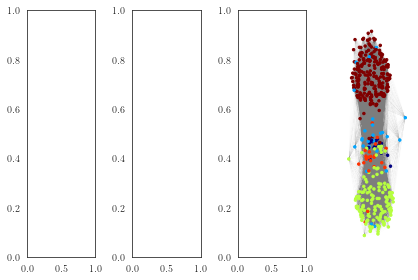

In [88]:
fig

In [77]:
# pos0 = pos

In [65]:
# pos1 = pos

In [83]:
# pos2 = pos

In [89]:
# pos3 = pos

In [90]:
pos_list = [pos0, pos1, pos2, pos3]

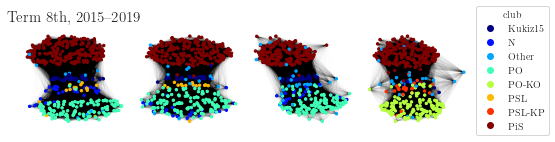

In [95]:
k = 8
years = [1,2,3,4]
b_level = 0.65
main_clubs = ['PiS', 'PO', 'PO-KO', 'Kukiz15', 'PSL-KP', 'PSL', 'N']
title = r'Term 8th, 2015--2019'
bbox_to_anchor=(1.7, 1.25)

fig, ax = plt.subplots(1, 4)
fig.tight_layout()

for j in range(len(gs)):
    g = gs[j]
    nodes = g.nodes()
    colors = [mapping[g.nodes[n]['party']] for n in nodes]
#         pos = nx.spring_layout(g)
    pos = pos_list[j] 
    ec = nx.draw_networkx_edges(g, pos, alpha=0.008, ax=ax[j])
    nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet, ax=ax[j],
                               vmin=vmin, vmax=vmax)
    ax[j].axis('off')

ax[0].set_title(title, size=15)
lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
                label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
handles = [lp(i) for i in list(mapping.values())]
plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f'images/networks/{k}.pdf', bbox_inches='tight')
plt.show()

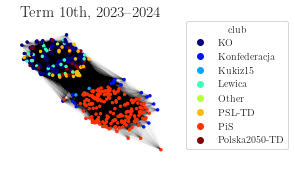

In [111]:
k = 10
years = [1]
b_level = 0.65
main_clubs = ['PiS', 'KO', 'Lewica', 'Polska2050-TD', 'PSL-TD', 'Konfederacja', 'Kukiz15']
title = r'Term 10th, 2023--2024'
bbox_to_anchor=(1.7, 1.05)

group_all = set()
gs = []
for y in years:
    file_name = f'G_{k}_y{y}.pickle'

    # 1. backbone
    G = pickle.load(open(f'graphs/yearly/{file_name}', 'rb'))
    attr = nx.get_node_attributes(G, 'party')

    df = nb.disparity(G)
    g = nb.filters.fraction_filter(df, b_level)
    nx.set_node_attributes(g, attr, "party")

    # 2. category other
    for node_id, club in g.nodes(data='party'):
        if club not in main_clubs:
            g.nodes[node_id]['party'] = 'Other'
    gs.append(g)

    # 3. color mapping 
    group = set(nx.get_node_attributes(g, 'party').values())
    group_all.update(group)

mapping = dict(zip(sorted(group_all), itertools.count()))
vmin=min(list(mapping.values()))
vmax=max(list(mapping.values()))

fig, ax = plt.subplots(1, 1, figsize=(3, 2.5))
fig.tight_layout()


nodes = g.nodes()
colors = [mapping[g.nodes[n]['party']] for n in nodes]
pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.008, ax=ax)
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet, ax=ax,
                           vmin=vmin, vmax=vmax)
ax.axis('off')

ax.set_title(title, size=15)
lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
                label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
handles = [lp(i) for i in list(mapping.values())]
plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f'images/networks/{k}.pdf', bbox_inches='tight')
plt.show()

In [124]:
k = 9
years = [1,2,3,4]
b_level = 0.65
main_clubs = ['PiS', 'KO', 'Lewica', 'KP', 'PSL', 'Konfederacja', 'Polska2050', 'Kukiz15']
title = r'Term 9th, 2019--2023'
bbox_to_anchor=(1.8, 1.15)

group_all = set()
gs = []
for y in years:
    file_name = f'G_{k}_y{y}.pickle'

    # 1. backbone
    G = pickle.load(open(f'graphs/yearly/{file_name}', 'rb'))
    attr = nx.get_node_attributes(G, 'party')

    df = nb.disparity(G)
    g = nb.filters.fraction_filter(df, b_level)
    nx.set_node_attributes(g, attr, "party")

    # 2. category other
    for node_id, club in g.nodes(data='party'):
        if club not in main_clubs:
            g.nodes[node_id]['party'] = 'Other'
    gs.append(g)

    # 3. color mapping 
    group = set(nx.get_node_attributes(g, 'party').values())
    group_all.update(group)

mapping = dict(zip(sorted(group_all), itertools.count()))
vmin=min(list(mapping.values()))
vmax=max(list(mapping.values()))

(-0.4821777481224498,
 0.45715551497237333,
 -1.209892628255745,
 1.208870040215221)

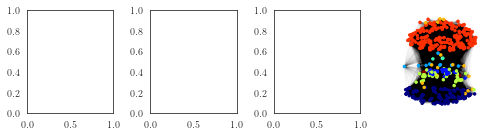

In [128]:
fig, ax = plt.subplots(1, 4)
fig.tight_layout()

# for j in range(len(gs)):
j = 3
g = gs[j]
nodes = g.nodes()
colors = [mapping[g.nodes[n]['party']] for n in nodes]
pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.008, ax=ax[j])
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet, ax=ax[j],
                           vmin=vmin, vmax=vmax)
ax[j].axis('off')

# ax[0].set_title(title, size=15)
# lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
#                 label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
# handles = [lp(i) for i in list(mapping.values())]
# plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig(f'images/networks/{k}.pdf', bbox_inches='tight', dpi=300)
# plt.show()

In [131]:
pos[447]

array([-0.1962894 , -0.94992033])

In [129]:
# pos0 = pos
# pos1 = pos
# pos2 = pos
pos3 = pos
pos_list = [pos0, pos1, pos2, pos3]

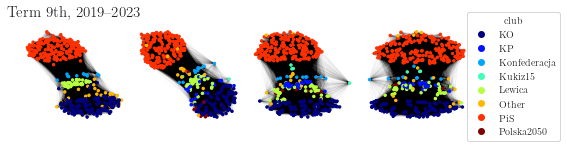

In [132]:
fig, ax = plt.subplots(1, 4)
fig.tight_layout()

for j in range(len(gs)):
    g = gs[j]
    nodes = g.nodes()
    colors = [mapping[g.nodes[n]['party']] for n in nodes]
#         pos = nx.spring_layout(g)
    pos = pos_list[j] 
    ec = nx.draw_networkx_edges(g, pos, alpha=0.008, ax=ax[j])
    nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet, ax=ax[j],
                               vmin=vmin, vmax=vmax)
    ax[j].axis('off')

ax[0].set_title(title, size=15)
lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
                label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
handles = [lp(i) for i in list(mapping.values())]
plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f'images/networks/{k}.pdf', bbox_inches='tight')
plt.show()

In [133]:
k = 7
years = [1,2,3,4]
b_level = 0.65
main_clubs = ['PiS', 'PO', 'SLD', 'PSL', 'RP', 'TP', 'SP']
title = r'Term 7th, 2011--2015'
bbox_to_anchor=(1.55, 1.15)

group_all = set()
gs = []
for y in years:
    file_name = f'G_{k}_y{y}.pickle'

    # 1. backbone
    G = pickle.load(open(f'graphs/yearly/{file_name}', 'rb'))
    attr = nx.get_node_attributes(G, 'party')

    df = nb.disparity(G)
    g = nb.filters.fraction_filter(df, b_level)
    nx.set_node_attributes(g, attr, "party")

    # 2. category other
    for node_id, club in g.nodes(data='party'):
        if club not in main_clubs:
            g.nodes[node_id]['party'] = 'Other'
    gs.append(g)

    # 3. color mapping 
    group = set(nx.get_node_attributes(g, 'party').values())
    group_all.update(group)

mapping = dict(zip(sorted(group_all), itertools.count()))
vmin=min(list(mapping.values()))
vmax=max(list(mapping.values()))

In [143]:
# fig, ax = plt.subplots(1, 4)
# fig.tight_layout()

# for j in range(len(gs)):
j = 3
g = gs[j]
nodes = g.nodes()
colors = [mapping[g.nodes[n]['party']] for n in nodes]
# pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.008, ax=ax[j])
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet, ax=ax[j],
                           vmin=vmin, vmax=vmax)
ax[j].axis('off')

# ax[0].set_title(title, size=15)
# lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
#                 label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
# handles = [lp(i) for i in list(mapping.values())]
# plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig(f'images/networks/{k}.pdf', bbox_inches='tight')
# plt.show()

(-0.5102562624495194,
 0.4488155549572553,
 -1.1920784970175584,
 1.0213975162324014)

In [146]:
# pos0 = pos
# pos1 = pos
# pos2 = pos
# pos3 = pos
pos_list = [pos0, pos1, pos2, pos3]

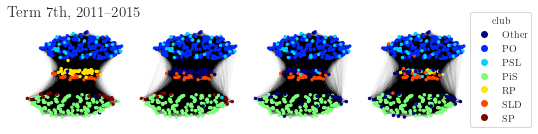

In [147]:
fig, ax = plt.subplots(1, 4)
fig.tight_layout()

for j in range(len(gs)):
    g = gs[j]
    nodes = g.nodes()
    colors = [mapping[g.nodes[n]['party']] for n in nodes]
    # pos = nx.spring_layout(g)
    pos = pos_list[j]
    ec = nx.draw_networkx_edges(g, pos, alpha=0.008, ax=ax[j])
    nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet, ax=ax[j],
                               vmin=vmin, vmax=vmax)
    ax[j].axis('off')

ax[0].set_title(title, size=15)
lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
                label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
handles = [lp(i) for i in list(mapping.values())]
plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f'images/networks/{k}.pdf', bbox_inches='tight')
plt.show()

In [215]:
k = 6
years = [1,2,3,4]
b_level = 0.65
main_clubs = ['PiS', 'PO', 'SLD', 'PSL', 'Lewica', 'LiD', 'PJN']
title = r'Term 6th, 2007--2011'
bbox_to_anchor=(1.63, 1.15)

group_all = set()
gs = []
for y in years:
    file_name = f'G_{k}_y{y}.pickle'

    # 1. backbone
    G = pickle.load(open(f'graphs/yearly/{file_name}', 'rb'))
    attr = nx.get_node_attributes(G, 'party')

    df = nb.disparity(G)
    g = nb.filters.fraction_filter(df, b_level)
    nx.set_node_attributes(g, attr, "party")

    # 2. category other
    for node_id, club in g.nodes(data='party'):
        if club not in main_clubs:
            g.nodes[node_id]['party'] = 'Other'
    gs.append(g)

    # 3. color mapping 
    group = set(nx.get_node_attributes(g, 'party').values())
    group_all.update(group)

mapping = dict(zip(sorted(group_all), itertools.count()))
vmin=min(list(mapping.values()))
vmax=max(list(mapping.values()))

(-0.25028356542297525,
 0.26780833555250005,
 -0.6741815924562241,
 1.1590851286949353)

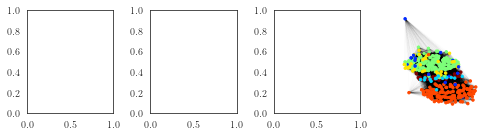

In [264]:
fig, ax = plt.subplots(1, 4)
fig.tight_layout()

# for j in range(len(gs)):
j = 3
g = gs[j]
nodes = g.nodes()
colors = [mapping[g.nodes[n]['party']] for n in nodes]
pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.008, ax=ax[j])
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet, ax=ax[j],
                               vmin=vmin, vmax=vmax)
ax[j].axis('off')

# ax[0].set_title(title, size=15)
# lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
#                 label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
# handles = [lp(i) for i in list(mapping.values())]
# plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig(f'images/networks/{k}.pdf', bbox_inches='tight')
# plt.show()

In [266]:
# pos0 = pos
# pos1 = pos
# pos2 = pos
# pos3 = pos
pos_list = [pos0, pos1, pos2, pos3]

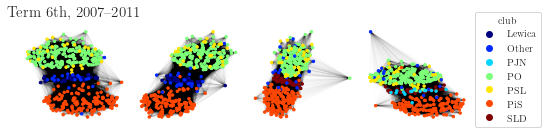

In [267]:
fig, ax = plt.subplots(1, 4)
fig.tight_layout()

for j in range(len(gs)):
    g = gs[j]
    nodes = g.nodes()
    colors = [mapping[g.nodes[n]['party']] for n in nodes]
#     pos = nx.spring_layout(g)
    pos = pos_list[j]
    ec = nx.draw_networkx_edges(g, pos, alpha=0.008, ax=ax[j])
    nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet, ax=ax[j],
                                   vmin=vmin, vmax=vmax)
    ax[j].axis('off')

ax[0].set_title(title, size=15)
lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
                label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
handles = [lp(i) for i in list(mapping.values())]
plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f'images/networks/{k}.pdf', bbox_inches='tight')
plt.show()

In [269]:
k = 5
years = [1,2]
b_level = 0.65
main_clubs = ['PiS', 'PO', 'SLD', 'PSL', 'LPR', 'Samoobrona']
title = r'Term 5th, 2005--2007'
bbox_to_anchor=(1.65, 1.01)

group_all = set()
gs = []
for y in years:
    file_name = f'G_{k}_y{y}.pickle'

    # 1. backbone
    G = pickle.load(open(f'graphs/yearly/{file_name}', 'rb'))
    attr = nx.get_node_attributes(G, 'party')

    df = nb.disparity(G)
    g = nb.filters.fraction_filter(df, b_level)
    nx.set_node_attributes(g, attr, "party")

    # 2. category other
    for node_id, club in g.nodes(data='party'):
        if club not in main_clubs:
            g.nodes[node_id]['party'] = 'Other'
    gs.append(g)

    # 3. color mapping 
    group = set(nx.get_node_attributes(g, 'party').values())
    group_all.update(group)

mapping = dict(zip(sorted(group_all), itertools.count()))
vmin=min(list(mapping.values()))
vmax=max(list(mapping.values()))

(-0.42330062849656436,
 0.740360231871392,
 -0.6390099628399534,
 1.1557430281431629)

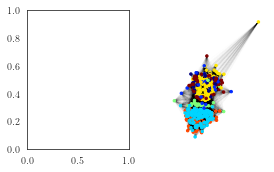

In [275]:
fig, ax = plt.subplots(1, 2, figsize=(4, 2.5))
fig.tight_layout()

# for j in range(len(gs)):
j = 1
g = gs[j]
nodes = g.nodes()
colors = [mapping[g.nodes[n]['party']] for n in nodes]
pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.008, ax=ax[j])
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet, ax=ax[j],
                           vmin=vmin, vmax=vmax)
ax[j].axis('off')

# ax[0].set_title(title, size=15)
# lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
#                 label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
# handles = [lp(i) for i in list(mapping.values())]
# plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig(f'images/networks/{k}.pdf', bbox_inches='tight')
# plt.show()

In [277]:
# pos0 = pos
pos1 = pos
pos_list = [pos0, pos1]

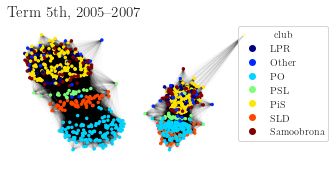

In [278]:
fig, ax = plt.subplots(1, 2, figsize=(4, 2.5))
fig.tight_layout()

for j in range(len(gs)):
    g = gs[j]
    nodes = g.nodes()
    colors = [mapping[g.nodes[n]['party']] for n in nodes]
#     pos = nx.spring_layout(g)
    pos = pos_list[j]
    ec = nx.draw_networkx_edges(g, pos, alpha=0.008, ax=ax[j])
    nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet, ax=ax[j],
                               vmin=vmin, vmax=vmax)
    ax[j].axis('off')

ax[0].set_title(title, size=15)
lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
                label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
handles = [lp(i) for i in list(mapping.values())]
plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f'images/networks/{k}.pdf', bbox_inches='tight')
plt.show()

In [279]:
k = 4
years = [1,2,3,4]
b_level = 0.65
main_clubs = ['PiS', 'PO', 'LPR', 'Samoobrona', 'SLD', 'PSL', 'UP', 'SDPL']
title = r'Term 4th, 2001--2005'
bbox_to_anchor=(1.7, 1.1)

group_all = set()
gs = []
for y in years:
    file_name = f'G_{k}_y{y}.pickle'

    # 1. backbone
    G = pickle.load(open(f'graphs/yearly/{file_name}', 'rb'))
    attr = nx.get_node_attributes(G, 'party')

    df = nb.disparity(G)
    if y == 4:
        b_level = 0.55
    g = nb.filters.fraction_filter(df, b_level)
    nx.set_node_attributes(g, attr, "party")

    # 2. category other
    for node_id, club in g.nodes(data='party'):
        if club not in main_clubs:
            g.nodes[node_id]['party'] = 'Other'
    gs.append(g)

    # 3. color mapping 
    group = set(nx.get_node_attributes(g, 'party').values())
    group_all.update(group)

mapping = dict(zip(sorted(group_all), itertools.count()))
vmin=min(list(mapping.values()))
vmax=max(list(mapping.values()))


(-0.7312914632412236,
 1.164511858498035,
 -0.5264771926745481,
 0.6150485515486956)

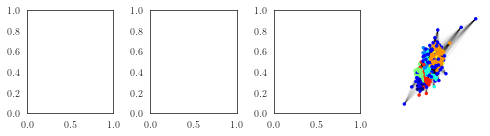

In [290]:
fig, ax = plt.subplots(1, 4)
fig.tight_layout()

# for j in range(len(gs)):
j = 3
g = gs[j]
nodes = g.nodes()
colors = [mapping[g.nodes[n]['party']] for n in nodes]
pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.008, ax=ax[j])
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet, ax=ax[j],
                           vmin=vmin, vmax=vmax)
ax[j].axis('off')

# ax[0].set_title(title, size=15)
# lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
#                 label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
# handles = [lp(i) for i in list(mapping.values())]
# plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig(f'images/networks/{k}.pdf', bbox_inches='tight')
# plt.show()

In [291]:
# pos0 = pos
# pos1 = pos
# pos2 = pos
pos3 = pos
pos_list = [pos0, pos1, pos2, pos3]

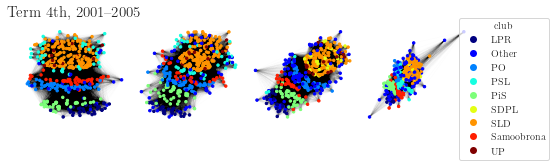

In [292]:
fig, ax = plt.subplots(1, 4)
fig.tight_layout()

for j in range(len(gs)):
    g = gs[j]
    nodes = g.nodes()
    colors = [mapping[g.nodes[n]['party']] for n in nodes]
#     pos = nx.spring_layout(g)
    pos = pos_list[j]
    ec = nx.draw_networkx_edges(g, pos, alpha=0.008, ax=ax[j])
    nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet, ax=ax[j],
                               vmin=vmin, vmax=vmax)
    ax[j].axis('off')

ax[0].set_title(title, size=15)
lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
                label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
handles = [lp(i) for i in list(mapping.values())]
plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f'images/networks/{k}.pdf', bbox_inches='tight')
plt.show()

In [293]:
k = 3
years = [1,2,3,4]
b_level = 0.65
main_clubs = ['AWS', 'UW', 'PSL', 'PiS', 'SKL', 'SLD', 'niez.']
title = r'Term 3rd, 1997--2001'
bbox_to_anchor=(1.63, 1.1)

group_all = set()
gs = []
for y in years:
    file_name = f'G_{k}_y{y}.pickle'

    # 1. backbone
    G = pickle.load(open(f'graphs/yearly/{file_name}', 'rb'))
    attr = nx.get_node_attributes(G, 'party')

    df = nb.disparity(G)
    g = nb.filters.fraction_filter(df, b_level)
    nx.set_node_attributes(g, attr, "party")

    # 2. category other
    for node_id, club in g.nodes(data='party'):
        if club not in main_clubs:
            g.nodes[node_id]['party'] = 'Other'
    gs.append(g)

    # 3. color mapping 
    group = set(nx.get_node_attributes(g, 'party').values())
    group_all.update(group)

mapping = dict(zip(sorted(group_all), itertools.count()))
vmin=min(list(mapping.values()))
vmax=max(list(mapping.values()))


(-1.1206506969501866,
 0.2697049536186313,
 -0.3043640194342112,
 0.6994925320698727)

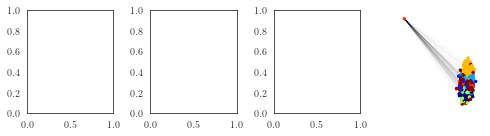

In [333]:
fig, ax = plt.subplots(1, 4)
fig.tight_layout()

# for j in range(len(gs)):
j = 3
g = gs[j]
nodes = g.nodes()
colors = [mapping[g.nodes[n]['party']] for n in nodes]
pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.008, ax=ax[j])
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet, ax=ax[j],
                           vmin=vmin, vmax=vmax)
ax[j].axis('off')

# ax[0].set_title(title, size=15)
# lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
#                 label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
# handles = [lp(i) for i in list(mapping.values())]
# plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig(f'images/networks/{k}.pdf', bbox_inches='tight')
# plt.show()

In [334]:
# pos0 = pos
# pos1 = pos
# pos2 = pos
pos3 = pos
pos_list = [pos0, pos1, pos2, pos3]

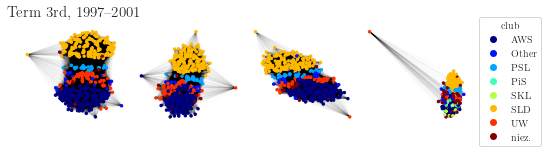

In [335]:
fig, ax = plt.subplots(1, 4)
fig.tight_layout()

for j in range(len(gs)):
    g = gs[j]
    nodes = g.nodes()
    colors = [mapping[g.nodes[n]['party']] for n in nodes]
#     pos = nx.spring_layout(g)
    pos = pos_list[j]
    ec = nx.draw_networkx_edges(g, pos, alpha=0.008, ax=ax[j])
    nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet, ax=ax[j],
                               vmin=vmin, vmax=vmax)
    ax[j].axis('off')
    

ax[0].set_title(title, size=15)
lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
                label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
handles = [lp(i) for i in list(mapping.values())]
plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f'images/networks/{k}.pdf', bbox_inches='tight')
plt.show()

# Whole term

In [37]:
sns.set_style("white")
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (3, 2.5)

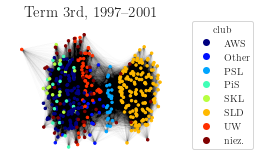

In [54]:
k = 3
b_level = 0.65
main_clubs = ['AWS', 'UW', 'PSL', 'PiS', 'SKL', 'SLD', 'niez.']
title = r'Term 3rd, 1997--2001'
bbox_to_anchor=(1.5, 1.05)


file_name = f'G_{k}.pickle'

# 1. backbone
G = pickle.load(open(f'graphs/{file_name}', 'rb'))
attr = nx.get_node_attributes(G, 'party')

df = nb.disparity(G)
g = nb.filters.fraction_filter(df, b_level)
nx.set_node_attributes(g, attr, "party")

# 2. category other
for node_id, club in g.nodes(data='party'):
    if club not in main_clubs:
        g.nodes[node_id]['party'] = 'Other'

# 3. color mapping 
group = set(nx.get_node_attributes(g, 'party').values())

mapping = dict(zip(sorted(group), itertools.count()))
vmin=min(list(mapping.values()))
vmax=max(list(mapping.values()))


nodes = g.nodes()
colors = [mapping[g.nodes[n]['party']] for n in nodes]
pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.008)
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet,
                           vmin=vmin, vmax=vmax)
plt.axis('off')

plt.title(title, size=15)
lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
                label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
handles = [lp(i) for i in list(mapping.values())]
plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f'images/networks/whole_term_{k}.pdf', bbox_inches='tight')
plt.show()

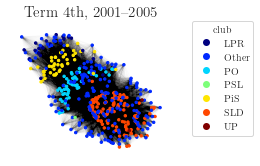

In [49]:
k = 4
b_level = 0.65
main_clubs = ['PiS', 'PO', 'LPR', 'Samobrona', 'SLD', 'PSL', 'UP']
title = r'Term 4th, 2001--2005'
bbox_to_anchor=(1.5, 1.05)


file_name = f'G_{k}.pickle'

# 1. backbone
G = pickle.load(open(f'graphs/{file_name}', 'rb'))
attr = nx.get_node_attributes(G, 'party')

df = nb.disparity(G)
g = nb.filters.fraction_filter(df, b_level)
nx.set_node_attributes(g, attr, "party")

# 2. category other
for node_id, club in g.nodes(data='party'):
    if club not in main_clubs:
        g.nodes[node_id]['party'] = 'Other'

# 3. color mapping 
group = set(nx.get_node_attributes(g, 'party').values())

mapping = dict(zip(sorted(group), itertools.count()))
vmin=min(list(mapping.values()))
vmax=max(list(mapping.values()))


nodes = g.nodes()
colors = [mapping[g.nodes[n]['party']] for n in nodes]
pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.008)
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet,
                           vmin=vmin, vmax=vmax)
plt.axis('off')

plt.title(title, size=15)
lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
                label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
handles = [lp(i) for i in list(mapping.values())]
plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f'images/networks/whole_term_{k}.pdf', bbox_inches='tight')
plt.show()

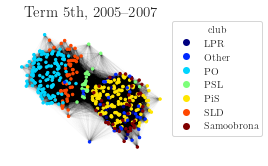

In [55]:
k = 5
b_level = 0.65
main_clubs = ['PiS', 'PO', 'SLD', 'PSL', 'LPR', 'Samoobrona']
title = r'Term 5th, 2005--2007'
bbox_to_anchor=(1.55, 1.05)


file_name = f'G_{k}.pickle'

# 1. backbone
G = pickle.load(open(f'graphs/{file_name}', 'rb'))
attr = nx.get_node_attributes(G, 'party')

df = nb.disparity(G)
g = nb.filters.fraction_filter(df, b_level)
nx.set_node_attributes(g, attr, "party")

# 2. category other
for node_id, club in g.nodes(data='party'):
    if club not in main_clubs:
        g.nodes[node_id]['party'] = 'Other'

# 3. color mapping 
group = set(nx.get_node_attributes(g, 'party').values())

mapping = dict(zip(sorted(group), itertools.count()))
vmin=min(list(mapping.values()))
vmax=max(list(mapping.values()))


nodes = g.nodes()
colors = [mapping[g.nodes[n]['party']] for n in nodes]
pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.008)
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet,
                           vmin=vmin, vmax=vmax)
plt.axis('off')

plt.title(title, size=15)
lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
                label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
handles = [lp(i) for i in list(mapping.values())]
plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f'images/networks/whole_term_{k}.pdf', bbox_inches='tight')
plt.show()

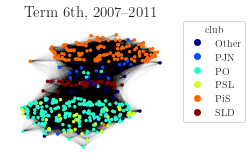

In [51]:
k = 6
b_level = 0.65
main_clubs = ['PiS', 'PO', 'SLD', 'PSL', 'Lewica', 'LiD', 'PJN']
title = r'Term 6th, 2007--2011'
bbox_to_anchor=(1.45, 1.05)


file_name = f'G_{k}.pickle'

# 1. backbone
G = pickle.load(open(f'graphs/{file_name}', 'rb'))
attr = nx.get_node_attributes(G, 'party')

df = nb.disparity(G)
g = nb.filters.fraction_filter(df, b_level)
nx.set_node_attributes(g, attr, "party")

# 2. category other
for node_id, club in g.nodes(data='party'):
    if club not in main_clubs:
        g.nodes[node_id]['party'] = 'Other'

# 3. color mapping 
group = set(nx.get_node_attributes(g, 'party').values())

mapping = dict(zip(sorted(group), itertools.count()))
vmin=min(list(mapping.values()))
vmax=max(list(mapping.values()))


nodes = g.nodes()
colors = [mapping[g.nodes[n]['party']] for n in nodes]
pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.008)
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet,
                           vmin=vmin, vmax=vmax)
plt.axis('off')

plt.title(title, size=15)
lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
                label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
handles = [lp(i) for i in list(mapping.values())]
plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f'images/networks/whole_term_{k}.pdf', bbox_inches='tight')
plt.show()

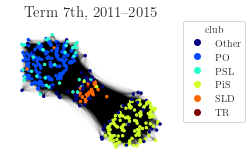

In [52]:
k = 7
b_level = 0.65
main_clubs = ['PiS', 'PO', 'SLD', 'PSL', 'RP', 'TR']
title = r'Term 7th, 2011--2015'
bbox_to_anchor=(1.45, 1.05)


file_name = f'G_{k}.pickle'

# 1. backbone
G = pickle.load(open(f'graphs/{file_name}', 'rb'))
attr = nx.get_node_attributes(G, 'party')

df = nb.disparity(G)
g = nb.filters.fraction_filter(df, b_level)
nx.set_node_attributes(g, attr, "party")

# 2. category other
for node_id, club in g.nodes(data='party'):
    if club not in main_clubs:
        g.nodes[node_id]['party'] = 'Other'

# 3. color mapping 
group = set(nx.get_node_attributes(g, 'party').values())

mapping = dict(zip(sorted(group), itertools.count()))
vmin=min(list(mapping.values()))
vmax=max(list(mapping.values()))


nodes = g.nodes()
colors = [mapping[g.nodes[n]['party']] for n in nodes]
pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.008)
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet,
                           vmin=vmin, vmax=vmax)
plt.axis('off')

plt.title(title, size=15)
lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
                label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
handles = [lp(i) for i in list(mapping.values())]
plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f'images/networks/whole_term_{k}.pdf', bbox_inches='tight')
plt.show()

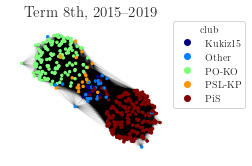

In [53]:
k = 8
b_level = 0.65
main_clubs = ['PiS', 'PO', 'PO-KO', 'Kukiz15', 'PSL-KP', 'PSL', 'N']
title = r'Term 8th, 2015--2019'
bbox_to_anchor=(1.45, 1.05)


file_name = f'G_{k}.pickle'

# 1. backbone
G = pickle.load(open(f'graphs/{file_name}', 'rb'))
attr = nx.get_node_attributes(G, 'party')

df = nb.disparity(G)
g = nb.filters.fraction_filter(df, b_level)
nx.set_node_attributes(g, attr, "party")

# 2. category other
for node_id, club in g.nodes(data='party'):
    if club not in main_clubs:
        g.nodes[node_id]['party'] = 'Other'

# 3. color mapping 
group = set(nx.get_node_attributes(g, 'party').values())

mapping = dict(zip(sorted(group), itertools.count()))
vmin=min(list(mapping.values()))
vmax=max(list(mapping.values()))


nodes = g.nodes()
colors = [mapping[g.nodes[n]['party']] for n in nodes]
pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.008)
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet,
                           vmin=vmin, vmax=vmax)
plt.axis('off')

plt.title(title, size=15)
lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
                label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
handles = [lp(i) for i in list(mapping.values())]
plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f'images/networks/whole_term_{k}.pdf', bbox_inches='tight')
plt.show()

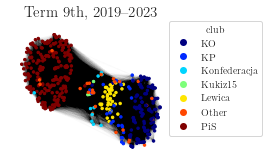

In [58]:
k = 9
b_level = 0.65
main_clubs = ['PiS', 'KO', 'Lewica', 'KP', 'PSL', 'Konfederacja', 'Kukiz15']
title = r'Term 9th, 2019--2023'
bbox_to_anchor=(1.55, 1.05)


file_name = f'G_{k}.pickle'

# 1. backbone
G = pickle.load(open(f'graphs/{file_name}', 'rb'))
attr = nx.get_node_attributes(G, 'party')

df = nb.disparity(G)
g = nb.filters.fraction_filter(df, b_level)
nx.set_node_attributes(g, attr, "party")

# 2. category other
for node_id, club in g.nodes(data='party'):
    if club not in main_clubs:
        g.nodes[node_id]['party'] = 'Other'

# 3. color mapping 
group = set(nx.get_node_attributes(g, 'party').values())

mapping = dict(zip(sorted(group), itertools.count()))
vmin=min(list(mapping.values()))
vmax=max(list(mapping.values()))


nodes = g.nodes()
colors = [mapping[g.nodes[n]['party']] for n in nodes]
pos = nx.spring_layout(g)
ec = nx.draw_networkx_edges(g, pos, alpha=0.008)
nc = nx.draw_networkx_nodes(g, pos, nodelist=nodes, node_color=colors, node_size=6, cmap=plt.cm.jet,
                           vmin=vmin, vmax=vmax)
plt.axis('off')

plt.title(title, size=15)
lp = lambda i: plt.plot([], color=nc.cmap(nc.norm(i)), ms=7, mec="none",
                label=list(mapping.keys())[list(mapping.values()).index(i)], ls="", marker="o")[0]
handles = [lp(i) for i in list(mapping.values())]
plt.legend(handles=handles, loc='upper right', title='club', bbox_to_anchor=bbox_to_anchor)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f'images/networks/whole_term_{k}.pdf', bbox_inches='tight')
plt.show()